# Handwritten Digit recognizer

The purpose of this model is to develop a  Convolutional Neural Network for recognizing handwritten digits


### Import statements

In [25]:
import tensorflow as tf

from keras.preprocessing import image

from tensorflow.python.keras.callbacks import ReduceLROnPlateau

import sys
sys.path.insert(1, "/home/azureuser/DataAnalyzer/src/modules")

from modules.data_validator import *
from modules.data_processing import *

## The data preparation


#### Data visualisation

In [26]:
#TODO:

### Data Validation

Validate the dataset using the data_validator method

In [27]:

training_path = "/home/azureuser/DataAnalyzer/digit_data/training"
testing_path =  "/home/azureuser/DataAnalyzer/digit_data/testing"
for i in range(10):
    data_validator(training_path+ str(i))
    data_validator(testing_path+ str(i))

### Generate directory to read images from & Data augmentation

#### Normalization

To avoid overfitting we will alter our dataset.
We chose :

    - Random rotation by 10° of some training image
    - Brightness_range from 30 to 70 : The user will take picture so we will adapt our model

    -Shift image to make them not in the center
        - Randomly shift images vertically
        - Randomly shift images horizontally


In [28]:
train_datagen = image.ImageDataGenerator(rescale=1.0/255.,rotation_range=10, zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.3,
        height_shift_range=0.3) 
test_datagen = image.ImageDataGenerator(rescale=1.0/255.,rotation_range=10, zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.3,
        height_shift_range=0.3)


#### Generate and set directory to read images from with data augnemtation

In [29]:
#object of class ImageDataGenerator with the recale property
train_generator = train_datagen.flow_from_directory(training_path,batch_size=600,class_mode='sparse',target_size=(28, 28),color_mode="rgb"  )

test_generator = test_datagen.flow_from_directory(testing_path, batch_size=600,class_mode='sparse',target_size=(28, 28),color_mode="rgb")


Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


test_generator & train_generator are directory to read images from.
Each subdirectory (digits directory) in this directory will be considered to contain images from one class.

In [30]:
print(test_generator.image_shape)
print(test_generator.save_to_dir)
print(train_generator.class_indices)

(28, 28, 3)
None
{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}


## The CNN modeling and evaluation

### Model


Model : we have to avoid overfitting

Softmax :  Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!
activation layer : tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
10 : because we have ten classes

In [31]:

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28,3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

#### compile the model
Following the results got by  https://github.com/sanghvirajit/Feedforward_Neural_Network
We make the choice of the RMSprop optimizer


In [32]:
optimizer = tf.keras.optimizers.RMSprop(lr=0.001)

model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#### Train the model

Reduce learning rate when a metric has stopped improving,we will gain in time while fitting the model by converging faster to the global minimum by decreasing the learning rate.
Set a learning rate annealer. we chose to decrease by 75%

In [33]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=5, # number of epochs with no improvement after which learning rate will be reduced.
                                            verbose=1, #update messages
                                            factor=0.25, #new_lr = lr * factor`.
                                            min_lr=0.00001 # minimum learning rate
                                            )

In [34]:
history = model.fit(train_generator, epochs=50, 
        validation_data=test_generator,  callbacks=[learning_rate_reduction])

Epoch 1/50
100/100 [==============================] - 63s 628ms/step - loss: 1.3756 - accuracy: 0.5415 - val_loss: 0.9438 - val_accuracy: 0.6952 - lr: 0.0010
Epoch 2/50
100/100 [==============================] - 52s 518ms/step - loss: 0.6949 - accuracy: 0.7782 - val_loss: 0.5228 - val_accuracy: 0.8334 - lr: 0.0010
Epoch 3/50
100/100 [==============================] - 52s 519ms/step - loss: 0.4929 - accuracy: 0.8453 - val_loss: 0.3591 - val_accuracy: 0.8858 - lr: 0.0010
Epoch 4/50
100/100 [==============================] - 52s 515ms/step - loss: 0.3887 - accuracy: 0.8784 - val_loss: 0.3325 - val_accuracy: 0.8890 - lr: 0.0010
Epoch 5/50
100/100 [==============================] - 51s 514ms/step - loss: 0.3158 - accuracy: 0.9007 - val_loss: 0.2505 - val_accuracy: 0.9184 - lr: 0.0010
Epoch 6/50
100/100 [==============================] - 51s 513ms/step - loss: 0.2734 - accuracy: 0.9134 - val_loss: 0.2445 - val_accuracy: 0.9216 - lr: 0.0010
Epoch 7/50
100/100 [==============================] 

## Model Evaluation

In [35]:
##TODO

In [36]:
evaluate_digits_model("/home/azureuser/DataAnalyzer/digit_data/testing/0/3.png",model)

(28, 28, 3)
1/1 [==============================] - 0s 63ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.0
[0]


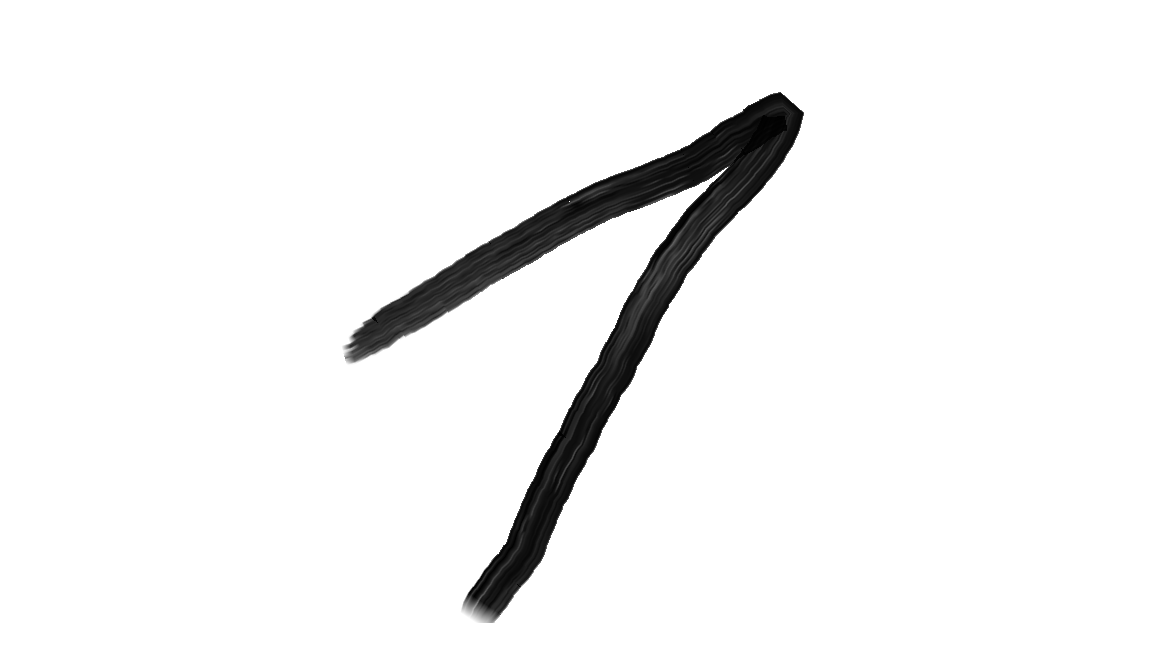

(255, 255, 255)
-57
-57
-60
-120
-123
-108
-84
-117
-183
-198
-177
-129
-57
-51
-66
-102
-126
-159
-237
-198
-255
-267
-240
-159
-72
-84
-123
-174
-186
-222
-285
-360
-342
-162
-132
-114
-294
-330
-333
-306
-174
-105
-120
-189
-237
-243
-279
-330
-399
-321
-186
-180
-141
-81
-201
-366
-414
-399
-333
-171
-141
-171
-261
-294
-297
-324
-372
-435
-315
-231
-222
-171
-114
-57
-312
-444
-495
-462
-339
-150
-180
-243
-345
-348
-348
-366
-411
-423
-318
-276
-255
-201
-147
-90
-99
-99
-75
-144
-438
-531
-561
-525
-330
-186
-222
-321
-411
-399
-393
-399
-444
-423
-339
-318
-285
-234
-177
-108
-153
-216
-189
-153
-114
-84
-78
-333
-531
-621
-621
-558
-303
-225
-270
-408
-465
-450
-426
-432
-471
-435
-384
-357
-315
-267
-210
-114
-60
-177
-318
-312
-279
-222
-177
-147
-282
-516
-588
-639
-627
-480
-240
-270
-351
-504
-516
-489
-453
-465
-489
-459
-423
-393
-351
-297
-240
-102
-69
-174
-378
-441
-411
-345
-279
-240
-267
-456
-573
-633
-633
-582
-375
-291
-327
-456
-573
-555
-516
-468
-492
-507
-49

(28, 28, 3)
1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
1.0
[7]


In [39]:
evaluate_digits_model("/home/azureuser/DataAnalyzer/digit_data/validation_statique/1.png",model)

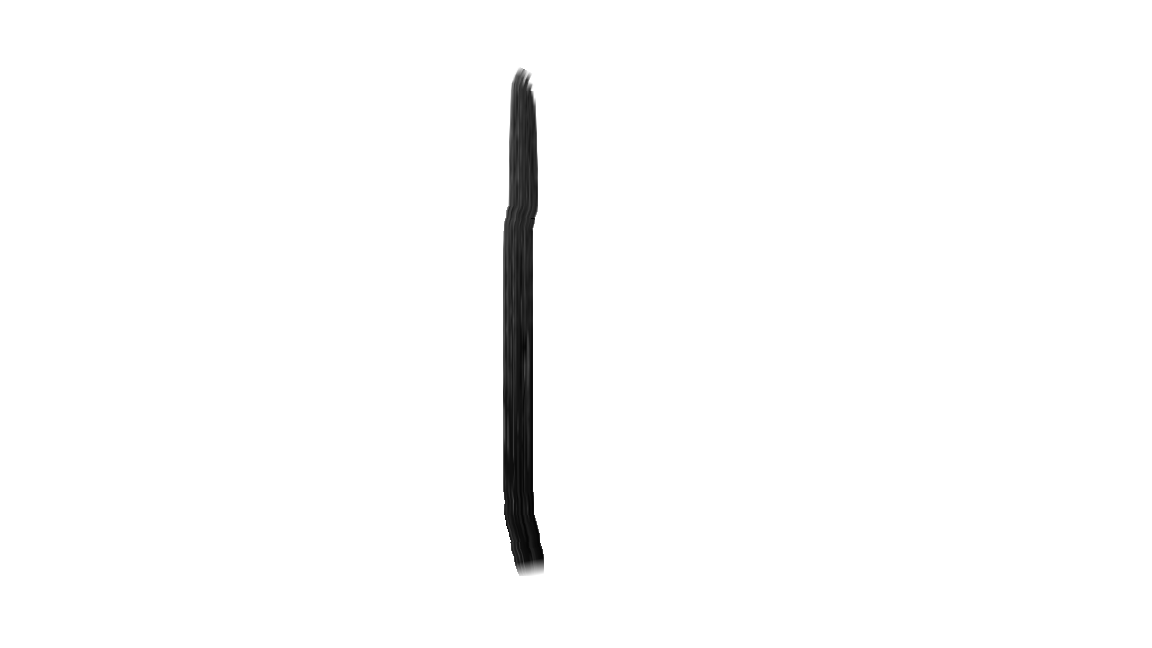

(255, 255, 255)
-195
-201
-210
-216
-225
-231
-240
-246
-255
-270
-291
-309
-330
-351
-372
-393
-411
-432
-441
-447
-450
-453
-459
-462
-465
-471
-474
-477
-477
-474
-474
-474
-474
-471
-471
-471
-471
-471
-471
-471
-471
-471
-471
-471
-471
-471
-474
-474
-477
-477
-480
-480
-483
-483
-486
-489
-492
-498
-501
-504
-507
-510
-513
-513
-510
-510
-507
-504
-501
-498
-498
-495
-495
-495
-495
-495
-492
-492
-492
-492
-492
-492
-492
-489
-489
-489
-489
-486
-486
-486
-486
-492
-495
-498
-501
-504
-507
-510
-513
-513
-510
-507
-507
-504
-501
-498
-498
-495
-495
-498
-501
-501
-504
-507
-507
-510
-513
-516
-519
-522
-525
-531
-534
-537
-540
-543
-546
-543
-543
-543
-540
-540
-540
-537
-534
-528
-522
-516
-510
-504
-498
-492
-486
-486
-486
-489
-492
-498
-501
-504
-507
-510
-519
-534
-549
-564
-579
-594
-609
-624
-639
-645
-642
-639
-633
-627
-624
-618
-612
-609
-600
-588
-573
-561
-546
-534
-519
-507
-492
-486
-486
-486
-486
-486
-486
-486
-486
-486
-483
-483
-480
-477
-474
-474
-471
-468
-465

(28, 28, 3)
1/1 [==============================] - 0s 11ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.0
[1]


In [40]:
evaluate_digits_model("/home/azureuser/DataAnalyzer/digit_data/validation_statique/1_1.png",model)